In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
diamonds=sns.load_dataset('diamonds')
exercise=sns.load_dataset('exercise')
flights=sns.load_dataset('flights')
geyser=sns.load_dataset('geyser')
iris=sns.load_dataset('iris')
penguins=sns.load_dataset('penguins')
planets=sns.load_dataset('planets')
mpg=sns.load_dataset('mpg')
tips = sns.load_dataset('tips')
titanic=sns.load_dataset('titanic')

In [10]:
geyser.head()

,duration,waiting,kind
0,3.600,79,long
1,1.800,54,short
2,3.333,74,long
3,2.283,62,short
4,4.533,85,long


In [9]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [7]:
flights.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [3]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


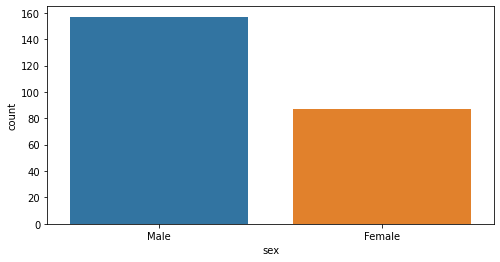

In [5]:
plt.figure(figsize=(8,4))
sns.countplot(x="sex", data=tips);

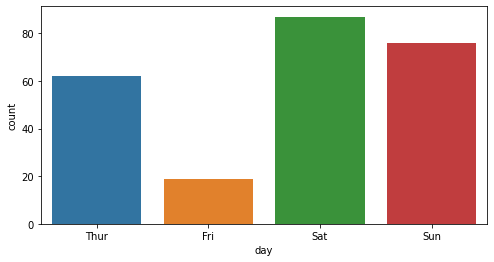

In [6]:
plt.figure(figsize=(8,4))
sns.countplot(x="day", data=tips);

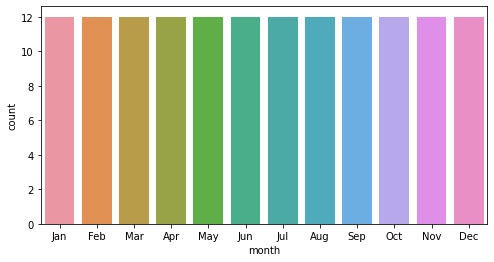

In [8]:
plt.figure(figsize=(8,4))
sns.countplot(x="month", data=flights);

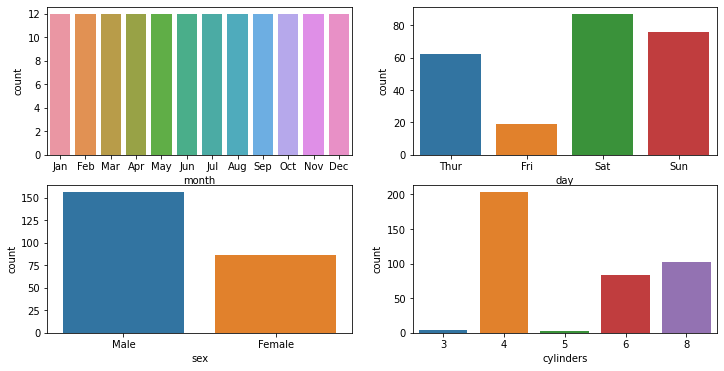

In [15]:
fig,ax = plt.subplots(2,2,figsize=(12,6))
sns.countplot(x="month", data=flights, ax = ax[0][0])
sns.countplot(x="day", data=tips,ax = ax[0][1])
sns.countplot(x="sex", data=tips,ax = ax[1][0])
sns.countplot(x="cylinders", data=mpg,ax = ax[1][1]);

<AxesSubplot:>

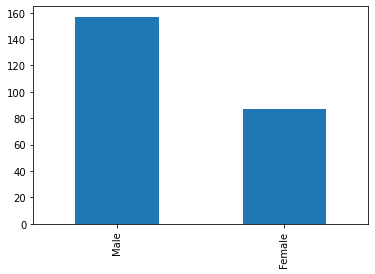

In [11]:
tips.sex.value_counts().plot.bar()

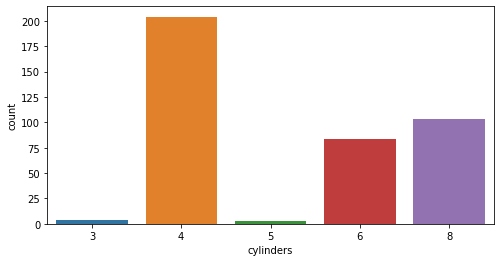

In [16]:
plt.figure(figsize=(8,4))
sns.countplot(x="cylinders",data=mpg);

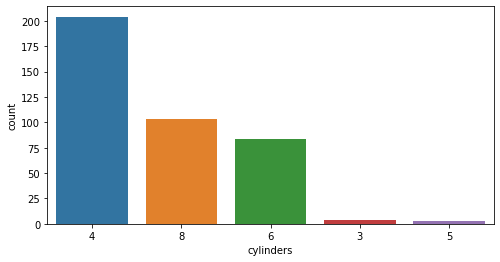

In [20]:
plt.figure(figsize=(8,4))
sns.countplot(x="cylinders",data=mpg,order=[4,8,6,3,5]);

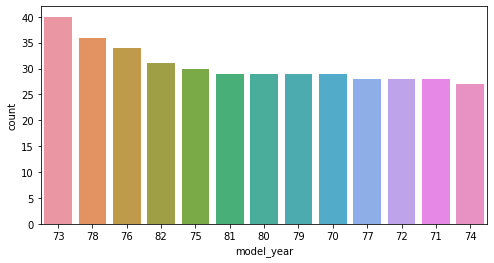

In [22]:
plt.figure(figsize=(8,4))
sns.countplot(x="model_year",data=mpg,order = mpg['model_year'].value_counts().index);

In [23]:
mpg['model_year'].value_counts()

73    40
78    36
76    34
82    31
75    30
81    29
80    29
79    29
70    29
77    28
72    28
71    28
74    27
Name: model_year, dtype: int64

In [24]:
mpg['model_year'].value_counts().index

Int64Index([73, 78, 76, 82, 75, 81, 80, 79, 70, 77, 72, 71, 74], dtype='int64')

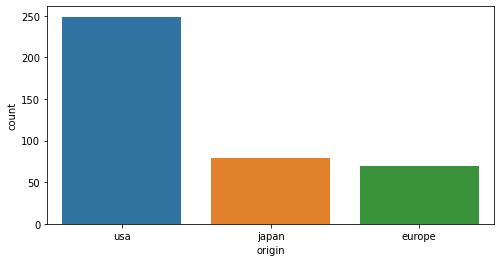

In [32]:
plt.figure(figsize=(8,4))
sns.countplot(x="origin",data=mpg);

In [33]:
mpg.groupby("model_year")["origin"].count()

model_year
70    29
71    28
72    28
73    40
74    27
75    30
76    34
77    28
78    36
79    29
80    29
81    29
82    31
Name: origin, dtype: int64

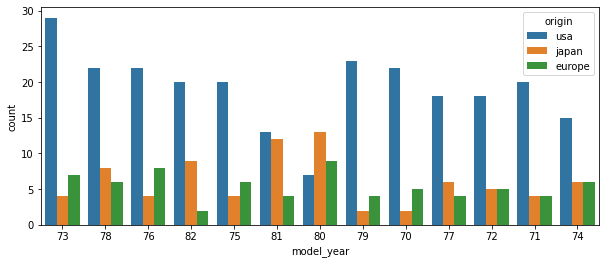

In [35]:
plt.figure(figsize=(10,4))
sns.countplot(x="model_year",data=mpg,order = mpg['model_year'].value_counts().index,hue="origin");

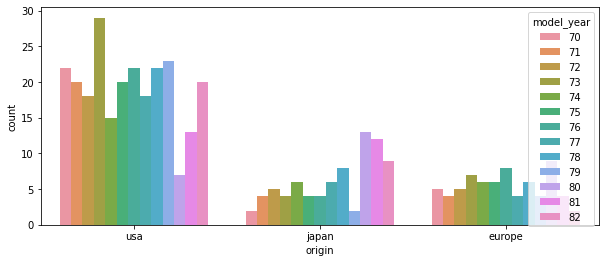

In [37]:
plt.figure(figsize=(10,4))
sns.countplot(x="origin",data=mpg,hue="model_year");

In [46]:
labels = ['G1', 'G2', 'G3', 'G4', 'G5']
men_means = [20, 34, 30, 35, 27]
women_means = [25, 32, 34, 20, 25]
df = pd.DataFrame(list(zip(labels, men_means, women_means)), columns =["labels", "men_means", "women_means"])
df.head()

,labels,men_means,women_means
0,G1,20,25
1,G2,34,32
2,G3,30,34
3,G4,35,20
4,G5,27,25


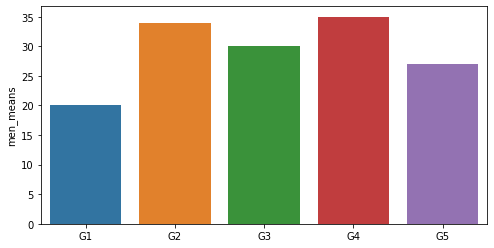

In [48]:
plt.figure(figsize=(8,4))
sns.barplot(x=labels, y="men_means", data=df);

In [61]:
df.sort_values("men_means").labels

0    G1
4    G5
2    G3
1    G2
3    G4
Name: labels, dtype: object

In [63]:
df.men_means.sort_values()

0    20
4    27
2    30
1    34
3    35
Name: men_means, dtype: int64

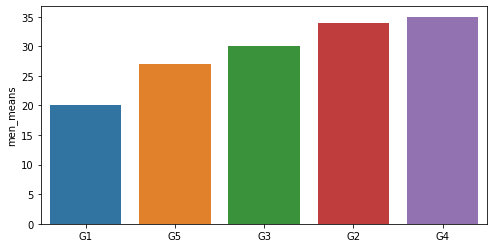

In [57]:
plt.figure(figsize=(8,4))
sns.barplot(x=labels, y="men_means",order=df.sort_values("men_means").labels, data=df);

In [60]:
df.sort_values("men_means", ascending=False).labels

3    G4
1    G2
2    G3
4    G5
0    G1
Name: labels, dtype: object

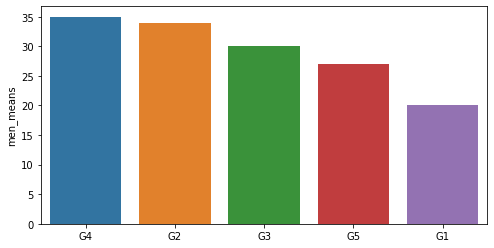

In [62]:
plt.figure(figsize=(8,4))
sns.barplot(x=labels, y="men_means",order=df.sort_values("men_means", ascending=False).labels, data=df);

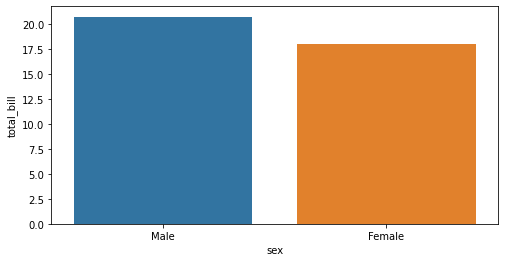

In [67]:
plt.figure(figsize=(8,4))
sns.barplot(x="sex",y="total_bill",data=tips, ci=None);

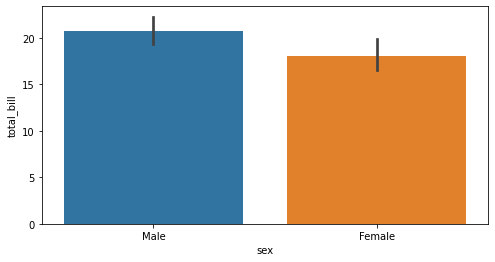

In [68]:
plt.figure(figsize=(8,4))
sns.barplot(x="sex",y="total_bill",data=tips); # ci default value 95

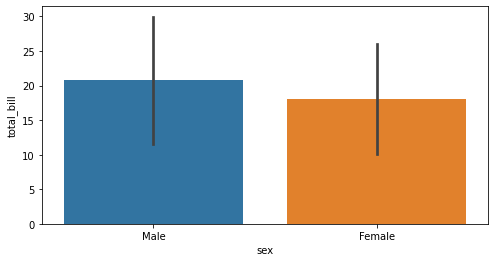

In [69]:
plt.figure(figsize=(8,4))
sns.barplot(x="sex",y="total_bill",data=tips, ci="sd");

In [70]:
tips.groupby("sex")["total_bill"].describe()

,count,mean,std,min,25%,50%,75%,max
sex,,,,,,,,
Male,157.0,20.744076,9.246469,7.25,14.00,18.35,24.71,50.81
Female,87.0,18.056897,8.009209,3.07,12.75,16.40,21.52,44.30


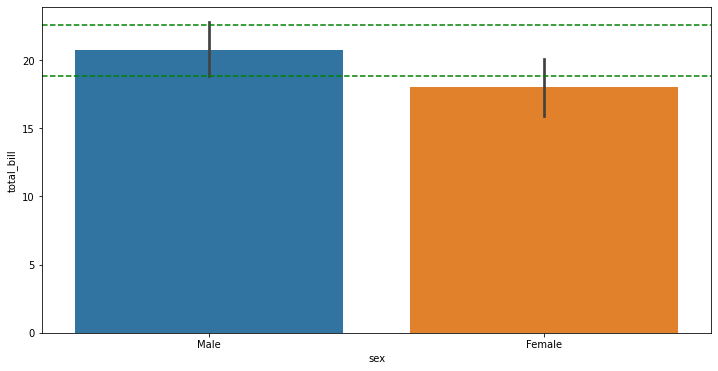

In [72]:
fig, ax = plt.subplots(figsize=(12,6))
sns.barplot(x="sex", y="total_bill", data=tips, ci=99)
ax.axhline(y=18.8, color="green", ls="--")
ax.axhline(y=22.6, color="green", ls="--");

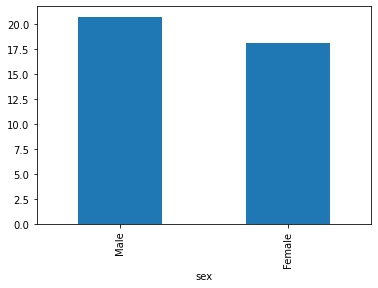

In [79]:
tips.groupby("sex")["total_bill"].mean().plot.bar();

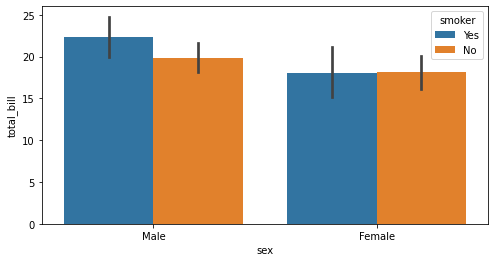

In [80]:
plt.figure(figsize=(8,4))
sns.barplot(x="sex",y="total_bill",data=tips,hue="smoker");

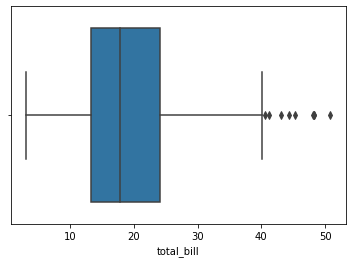

In [83]:
sns.boxplot(x="total_bill", data=tips);

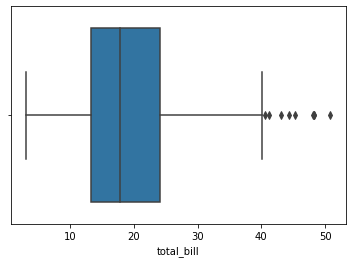

In [85]:
sns.boxplot(x=tips["total_bill"]);

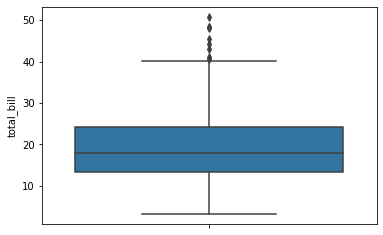

In [88]:
sns.boxplot(y=tips["total_bill"]);

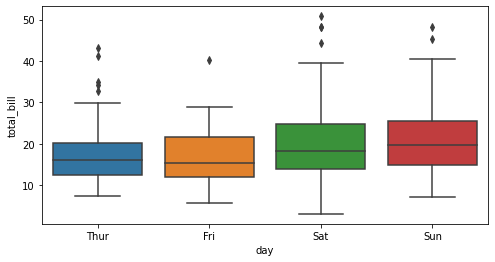

In [91]:
plt.figure(figsize=(8,4))
sns.boxplot(x="day",y="total_bill",data=tips);

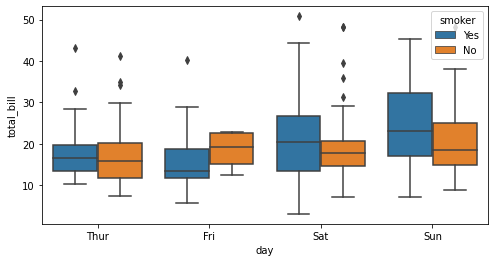

In [92]:
plt.figure(figsize=(8,4))
sns.boxplot(x="day",y="total_bill",data=tips,hue="smoker");

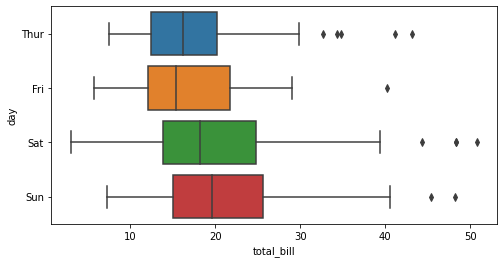

In [93]:
plt.figure(figsize=(8,4))
sns.boxplot(y="day",x="total_bill",orient="h",data=tips);

In [94]:
mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


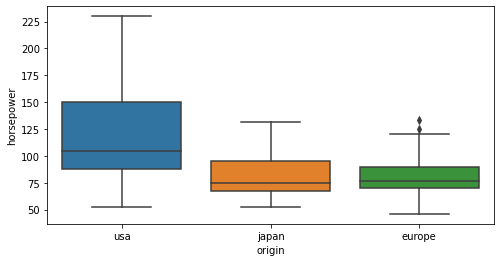

In [96]:
plt.figure(figsize=(8,4))
sns.boxplot(x="origin",y="horsepower",data=mpg);

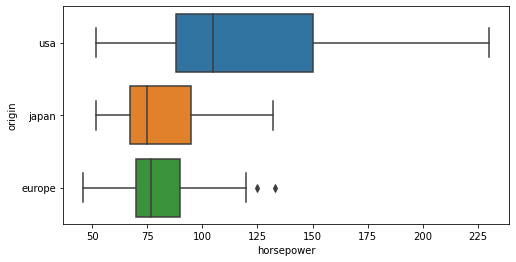

In [97]:
plt.figure(figsize=(8,4))
sns.boxplot(y="origin",x="horsepower",data=mpg);

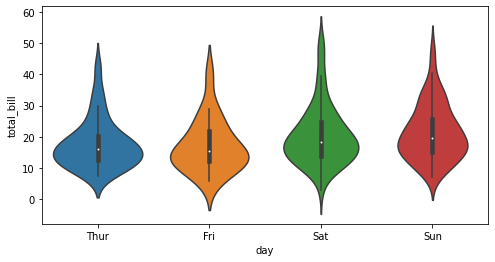

In [99]:
plt.figure(figsize=(8,4))
sns.violinplot(x="day", y="total_bill",data=tips);

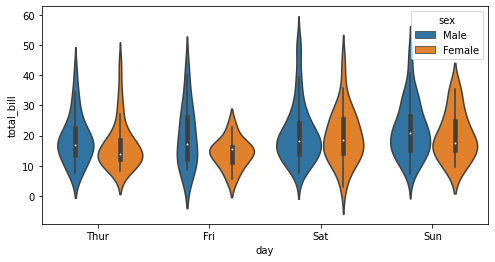

In [100]:
plt.figure(figsize=(8,4))
sns.violinplot(x="day", y="total_bill",data=tips,hue="sex");

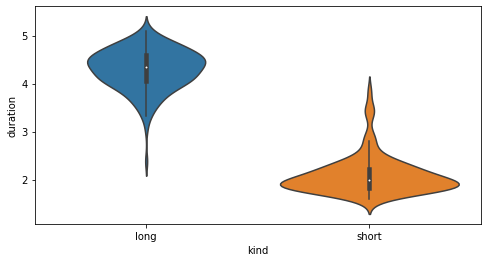

In [102]:
plt.figure(figsize=(8,4))
sns.violinplot(x="kind", y="duration",data=geyser);

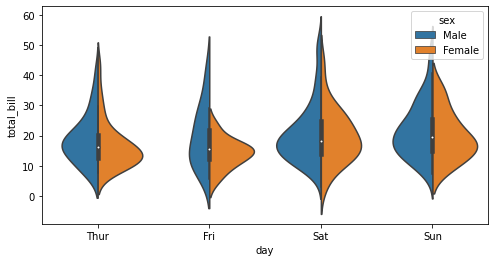

In [104]:
plt.figure(figsize=(8,4))
sns.violinplot(x="day", y="total_bill",data=tips, split=True,hue="sex");

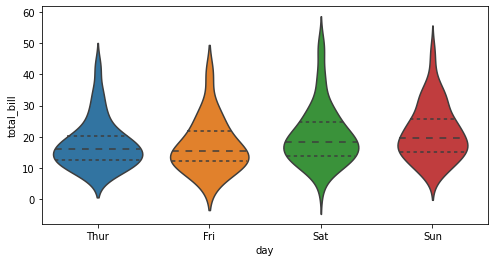

In [105]:
plt.figure(figsize=(8,4))
sns.violinplot(x="day", y="total_bill",data=tips, inner="quartile");

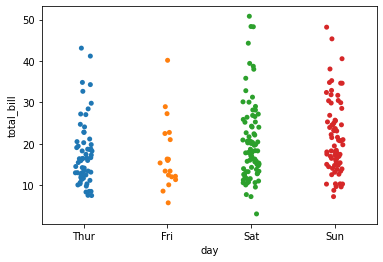

In [107]:
sns.stripplot(x="day", y="total_bill",data=tips);

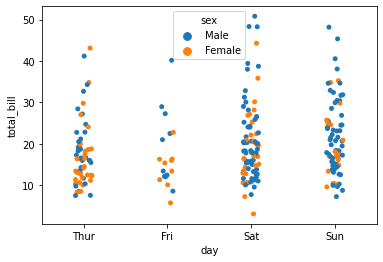

In [108]:
sns.stripplot(x="day", y="total_bill",data=tips, hue="sex");

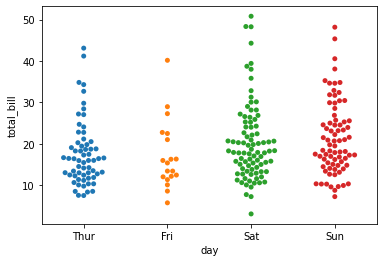

In [109]:
sns.swarmplot(x="day", y="total_bill",data=tips); # Swarm plot = violin + strip
# Don't use in large datasets

In [110]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


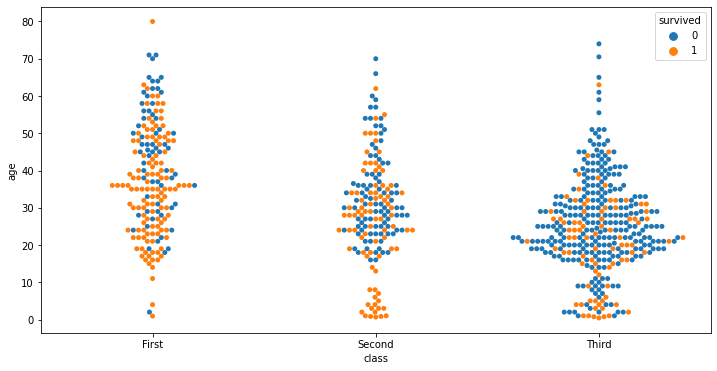

In [115]:
plt.figure(figsize=(12,6))
sns.swarmplot(x="class", y="age",data=titanic,hue="survived");

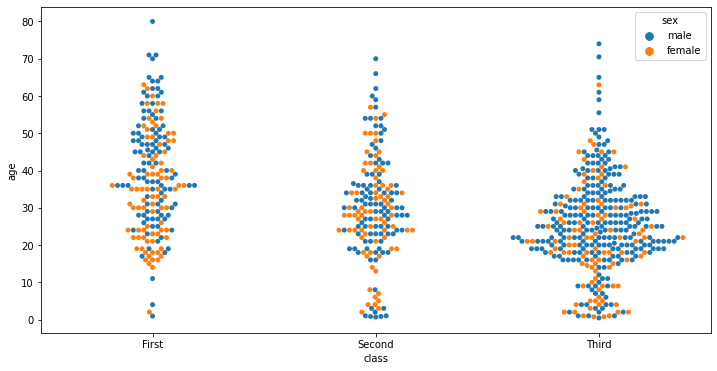

In [116]:
plt.figure(figsize=(12,6))
sns.swarmplot(x="class", y="age",data=titanic,hue="sex");

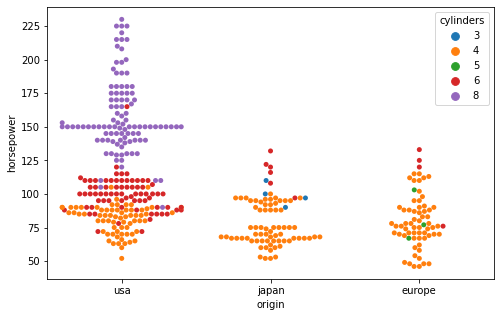

In [117]:
plt.figure(figsize=(8,5))
sns.swarmplot(x="origin", y="horsepower",data=mpg,hue="cylinders");

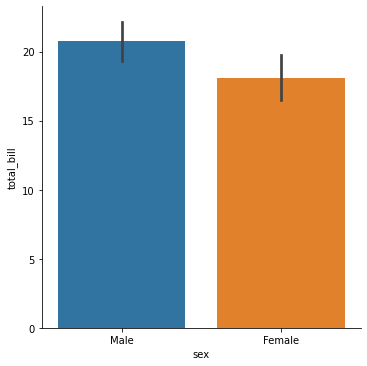

In [118]:
sns.catplot(x="sex", y="total_bill",data=tips,kind="bar");